In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [ ]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8013.000000,8013.000000,8013.000000
mean,0.386747,0.123424,4.198178
std,11.849649,3.334320,1.244423
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [ ]:
# df['Sentiment'] = df['Ratings'].apply(lambda x: 1 if x > 3 else 0)
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

def label_sentiment(review_text):
    # Analyze sentiment using VADER
    sentiment_score = analyzer.polarity_scores(review_text)

    # Determine sentiment label based on compound score
    sentiment_label = 1 if sentiment_score['compound'] >= 0 else 0

    return sentiment_label

# Apply label_sentiment function to the 'Review text' column
df['Sentiment'] = df['Review text'].apply(label_sentiment)


In [ ]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1
...,...,...,...,...,...,...,...,...,...
8495,vishal kumar ashish,Nice,"Certified Buyer, Haridwar",0.0,0.0,Oct 2016,Thanks to the delivery boy ... Service is alwa...,5,1
8496,Nitya Nand Rai,Good choice,"Certified Buyer, Raebareli",0.0,0.0,Oct 2016,Over priced even after 50% discount price is m...,1,0
8497,Tarun Reddy,Awesome,Certified Buyer,0.0,0.0,Oct 2016,Too much priced. It was getting me for Rs. 640...,1,1
8499,Jayachandra,High cost,"Certified Buyer, Mangalore",0.0,0.0,Dec 2015,Hii flipkart customers care..why your delivery...,5,1


**Distribution Analysis**

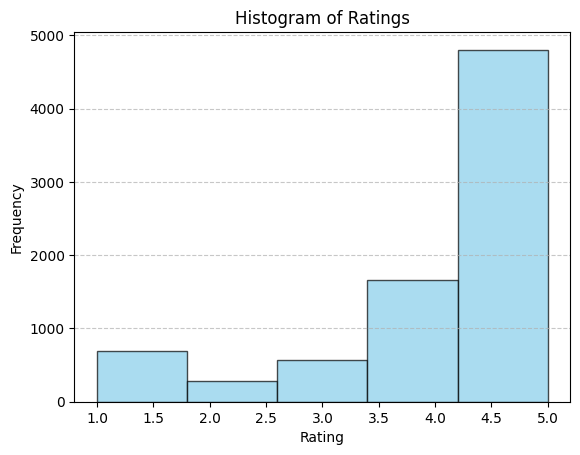

In [ ]:
# Analyze distribution of ratings
plt.hist(df['Ratings'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

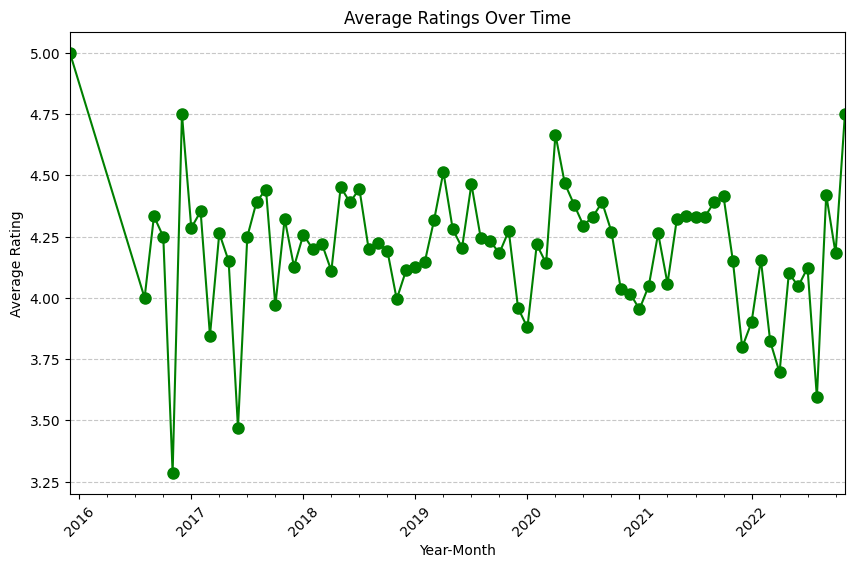

In [ ]:
# Analyze distribution of ratings over time
df['Month'] = pd.to_datetime(df['Month'])  # Convert 'Month' column to datetime format
df['YearMonth'] = df['Month'].dt.to_period('M')  # Extract Year-Month
ratings_over_time = df.groupby('YearMonth')['Ratings'].mean()

plt.figure(figsize=(10, 6))
ratings_over_time.plot(marker='o', color='green', linestyle='-', markersize=8)
plt.title('Average Ratings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Identify Input and Output**

In [ ]:
X = df['Review text']
y = df['Sentiment']

**Split the Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(6410,) (6410,)
(1603,) (1603,)


**Data Preprocessing on train data (X_train)**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

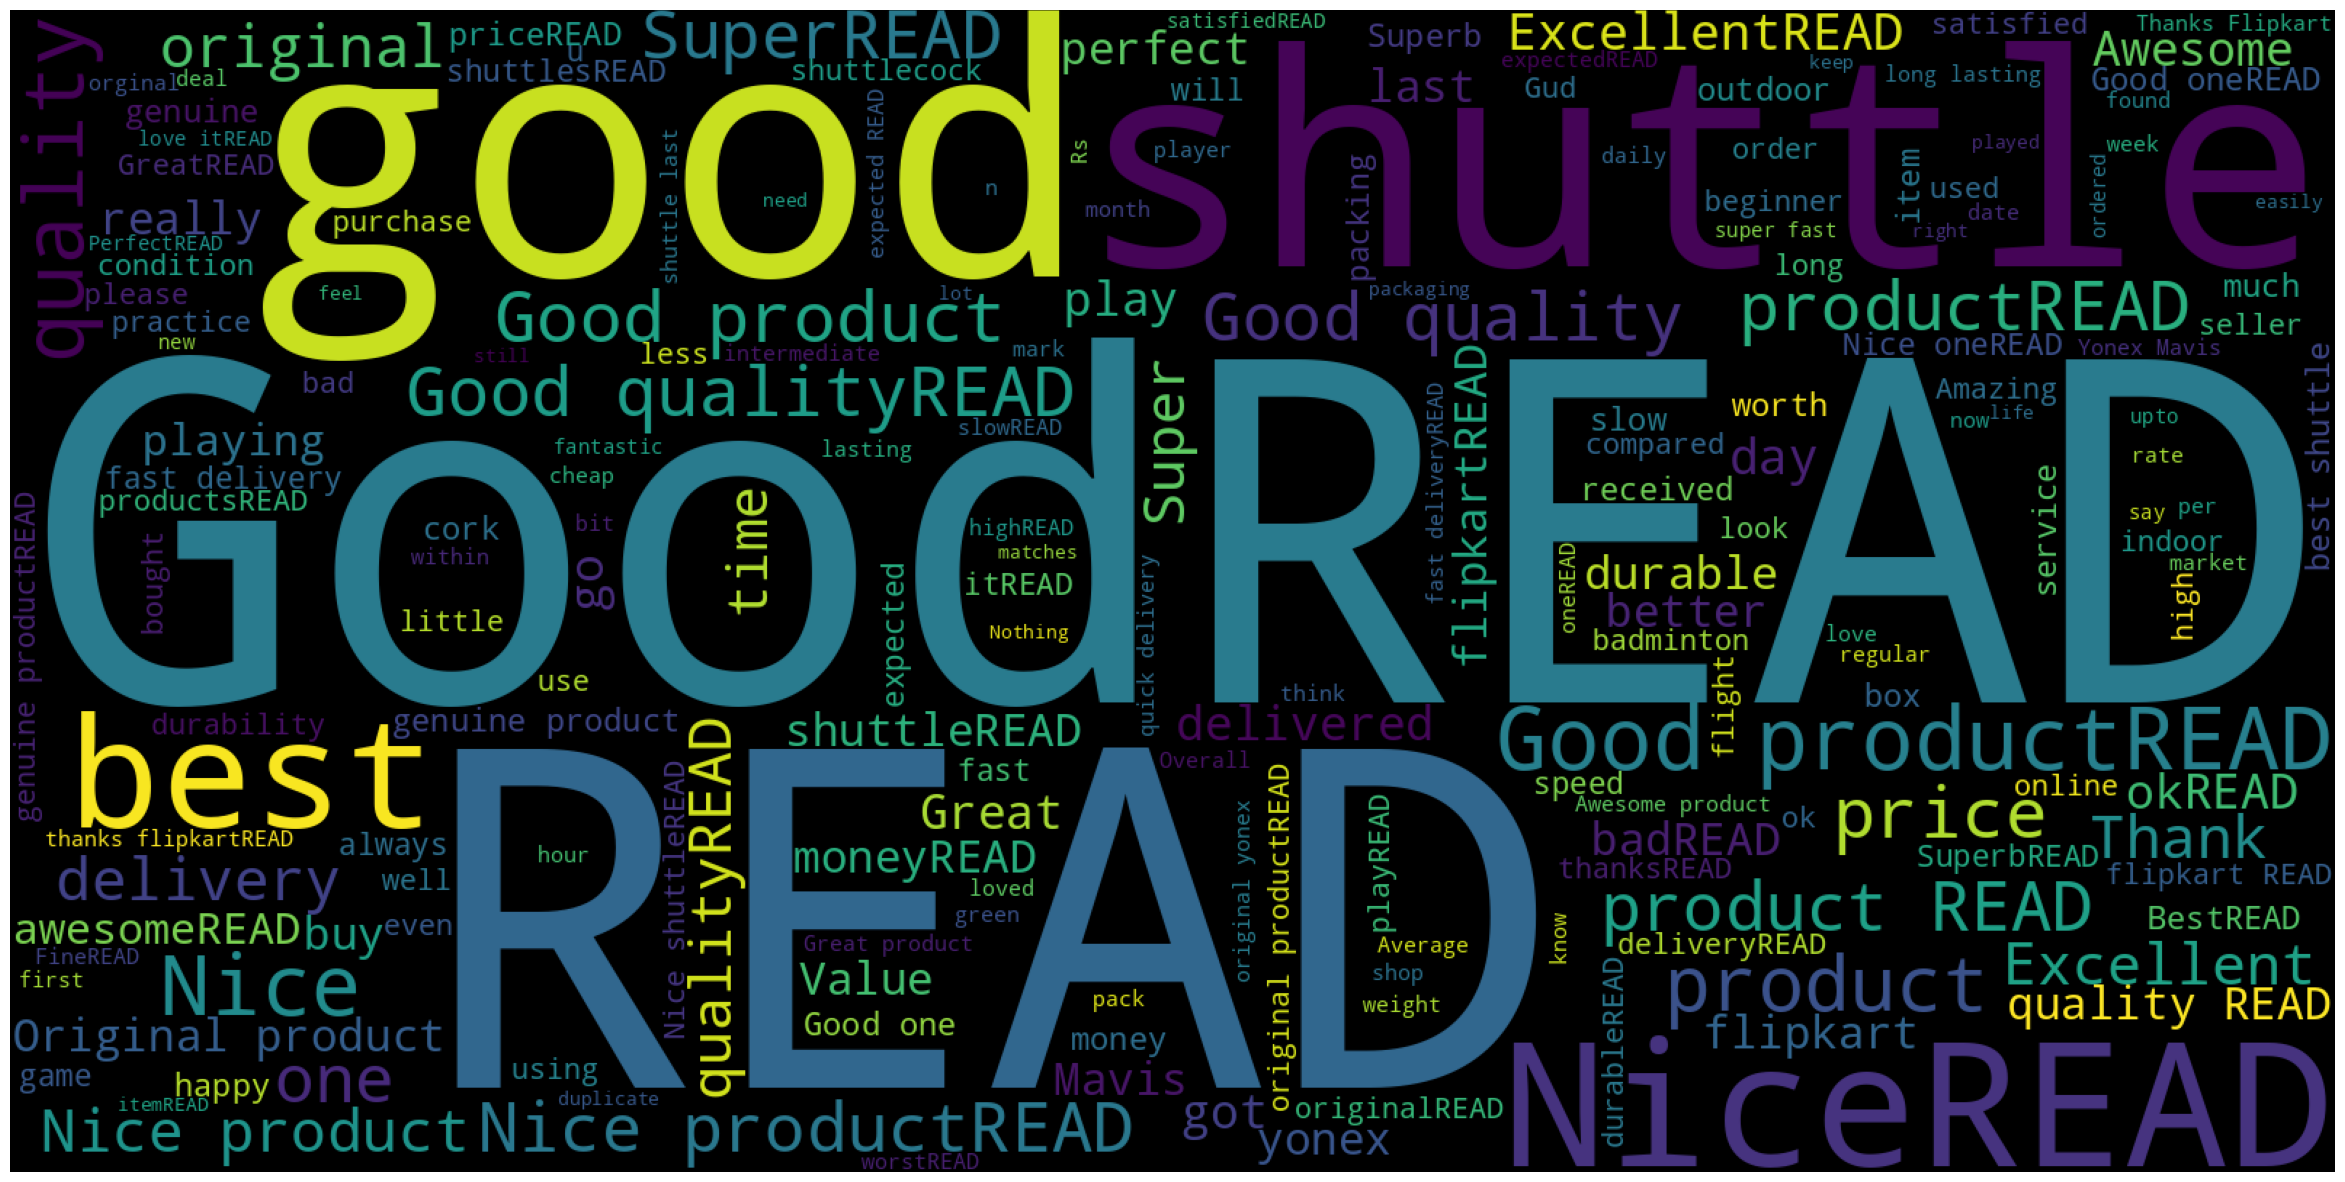

In [ ]:
display_wordcloud(X_train[y_train==1])

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def clean(doc): # doc is a string of text

    doc = re.sub(r'[^\w\s]', '', doc)

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [ ]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: user 2.83 s, sys: 173 ms, total: 3 s
Wall time: 3.09 s
(6410, 2966)


**Data Preprocessing on test data (X_test)**

In [ ]:
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1603, 2966)


 **Building a Model (i.e. Train the classifier)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 4.51 ms, sys: 42 µs, total: 4.55 ms
Wall time: 4.56 ms


MultinomialNB()

**Evaluating on Train Data**

In [ ]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)
metrics.accuracy_score(y_train, y_train_pred)

0.9666146645865835

In [ ]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 438,  151],
       [  63, 5758]])

Text(0.5, 23.52222222222222, 'Predicted')

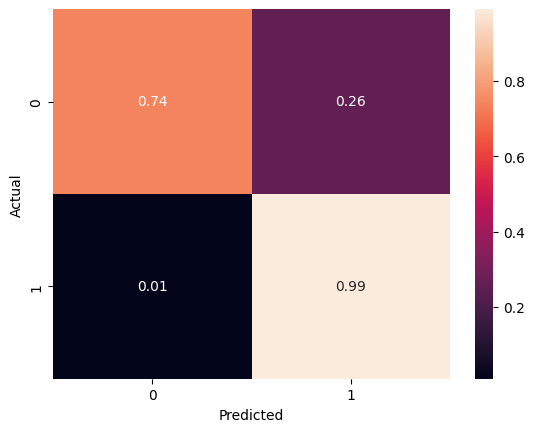

In [ ]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

**Evaluate on Test Data**

In [ ]:
# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9457267623206488

Text(0.5, 23.52222222222222, 'Predicted')

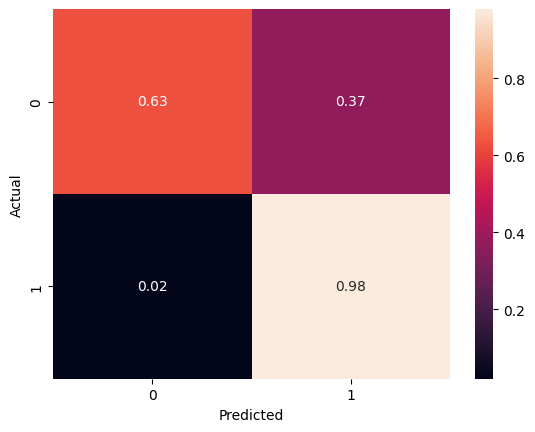

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9817561807331628
Test Score (F1 Score): 0.9703980945899966


**Creating an Optimal Workflow**

In [ ]:
%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: user 2.52 s, sys: 151 ms, total: 2.67 s
Wall time: 4.23 s


In [ ]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: user 464 ms, sys: 34.6 ms, total: 498 ms
Wall time: 502 ms


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics


from sklearn.pipeline import Pipeline
import warnings
import joblib
from joblib import Memory
import os
warnings.filterwarnings('ignore')

In [ ]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 9.68 s, sys: 52.8 ms, total: 9.74 s
Wall time: 9.8 s
Score on Test Data:  0.9703980945899966
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 22 s, sys: 115 ms, total: 22.2 s
Wall time: 22.3 s
Score on Test Data:  0.9770889487870621
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 11min 4s, sys: 665 ms, total: 11min 5s
Wall time: 11min 6s
Score on Test Data:  0.968479390370627


In [ ]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
save_path = '/content/drive/My Drive/best_models_2/'

Mounted at /content/drive


In [ ]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, save_path + f'{name}.pkl')
    model = joblib.load(save_path + f'{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(save_path + f'{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: user 17.7 ms, sys: 0 ns, total: 17.7 ms
Wall time: 18.5 ms
Test Score (F1) 0.9703980945899966
Model Size: 185527 Bytes
********** decision_tree **********
CPU times: user 17.1 ms, sys: 0 ns, total: 17.1 ms
Wall time: 17.3 ms
Test Score (F1) 0.9770889487870621
Model Size: 92409 Bytes
********** logistic_regression **********
CPU times: user 17 ms, sys: 0 ns, total: 17 ms
Wall time: 17 ms
Test Score (F1) 0.968479390370627
Model Size: 114442 Bytes
